In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
speed=[99,86,87,88,111,86,103,87,94,78,77,85,86]
x=np.mean(speed)
y=np.median(speed)
print(x)
print(y)

89.76923076923077
87.0


In [3]:
z=stats.mode(speed)
print(z)

ModeResult(mode=array([86]), count=array([3]))


standard deviation and variance

In [4]:
a=np.std(speed)
b=np.var(speed)
print(a)
print(b)

9.258292301032677
85.71597633136093


### percentile

In [5]:
c=np.percentile(speed,75) #checking 75% percentile
print(c)

94.0


### Normal data distribution


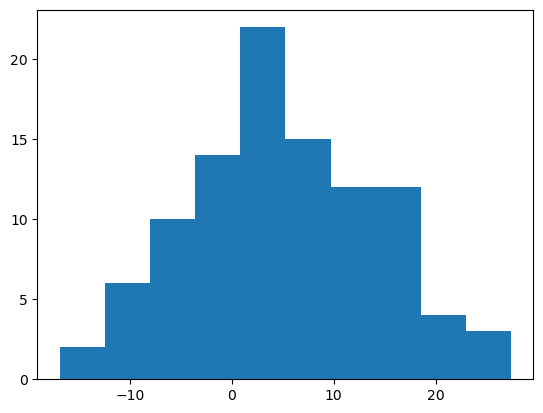

In [7]:
from matplotlib import pyplot as plt
x=np.random.normal(5,10,100)
plt.hist(x,10)
plt.show()

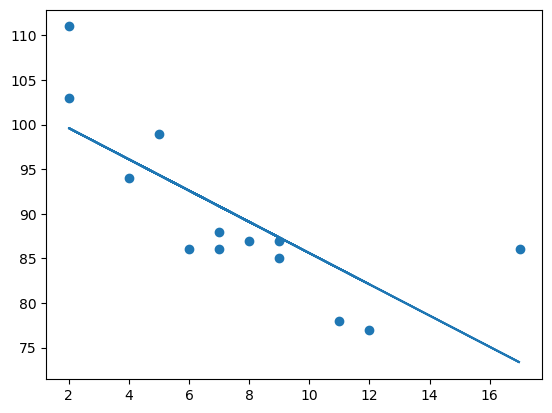

In [11]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
slope,intercept,r,p,std_err=stats.linregress(x,y)
def myfunc(x):
    return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()
#https://www.w3schools.com/python/python_ml_linear_regression.asp here for example brief

### predicting future values after 10 years

85.59308314937454


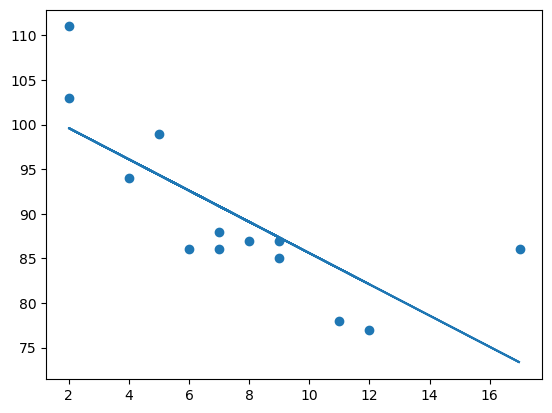

In [14]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]
slope,intercept,r,p,std_err=stats.linregress(x,y)
def myfunc(x):
    return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
speed=myfunc(10)
print(speed)

### Bad fit linear regression

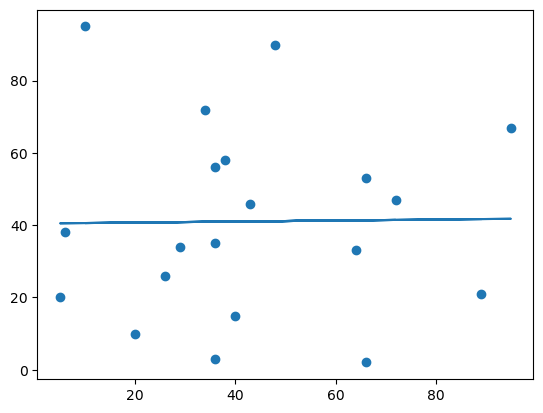

In [17]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]
slope,intercept,r,p,std_err=stats.linregress(x,y)
def myfunc(x):
    return slope*x+intercept
mymodel=list(map(myfunc,x))
plt.scatter(x,y)
plt.plot(x,mymodel)
plt.show()
#the bad linear regression or bad fit occurs when the dataset or user input data is inapporiate.

### polynomial regression

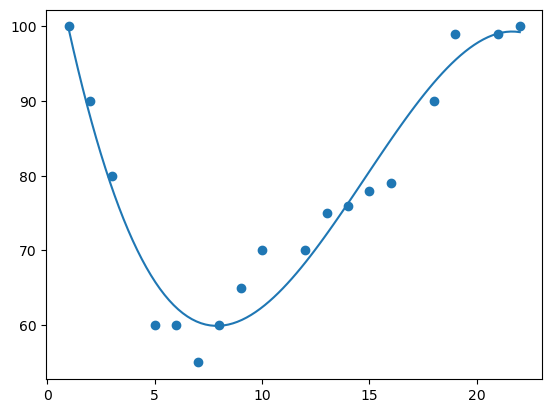

In [20]:
from sklearn.metrics import r2_score
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
mymodel=np.poly1d(np.polyfit(x,y,3))
myline=np.linspace(1,22,100)
plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

### predicting future values after 10 years

62.39730982562989


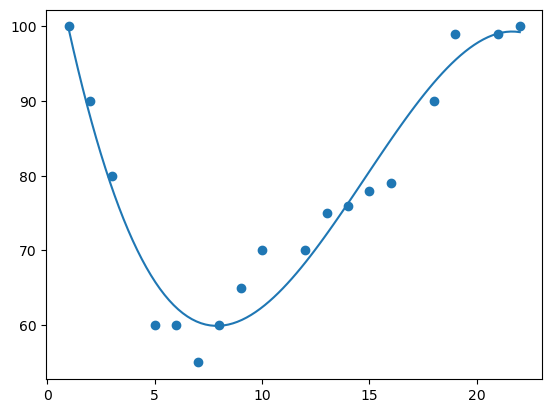

In [24]:
speed=mymodel(10)
print(speed)
plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

### Training and Testing 

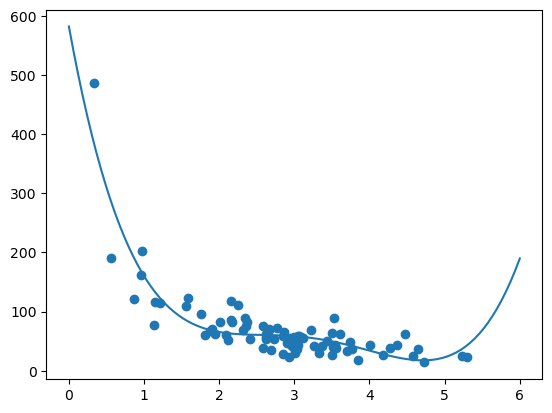

In [30]:
np.random.seed(2)
x=np.random.normal(3,1,100)
y=np.random.normal(150,40,100)/x
train_x=x[:80]
train_y=y[:80]
test_x=x[80:]
test_y=y[80:]
mymodel=np.poly1d(np.polyfit(train_x,train_y,4))
myline=np.linspace(0,6,100)
plt.scatter(train_x,train_y)
plt.plot(myline,mymodel(myline))
plt.show()

### Confusion Matrix


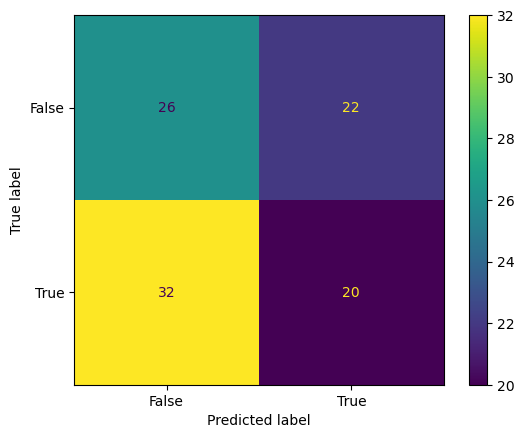

In [32]:
from sklearn import metrics
actualvalues=np.random.binomial(1,0.5,size=100)
predictedvalues=np.random.binomial(1,0.5,size=100)
confusion_matrix=metrics.confusion_matrix(actualvalues,predictedvalues)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()


Here the true means the values are predicted and false means the values are error or wrong prediction
The top left corner quadrant is false positive, top right quadrant is false negative ,bottom left quadrant is top positive and bottom right quadrant is top negative.

### Testing accuracy, precision,sensitivity(recall),F-Score,Specificity

In [36]:
accuracy=metrics.accuracy_score(actualvalues,predictedvalues)
precision=metrics.precision_score(actualvalues,predictedvalues)
sensitivity=metrics.recall_score(actualvalues,predictedvalues)
Specificity = metrics.recall_score(actualvalues, predictedvalues, pos_label=0)
f_score=metrics.f1_score(actualvalues,predictedvalues)
print(accuracy,precision,sensitivity,Specificity,f_score)

0.46 0.47619047619047616 0.38461538461538464 0.5416666666666666 0.42553191489361697


### Hierarchichal Clustering

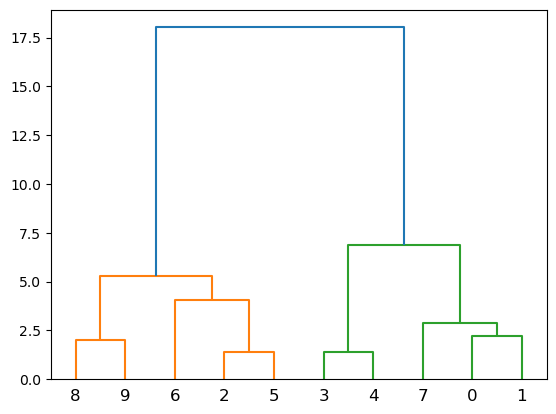

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data=list(zip(x,y))
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

### K-means

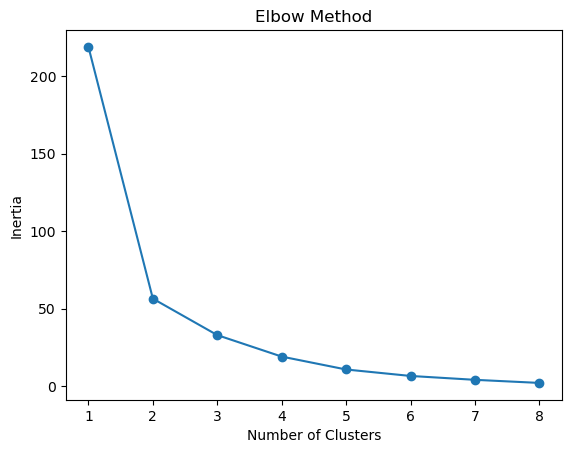

In [40]:
from sklearn.cluster import KMeans
data=list(zip(x,y))
inertias=[]
for i in range(1,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,9),inertias,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### K-nearest neighbour

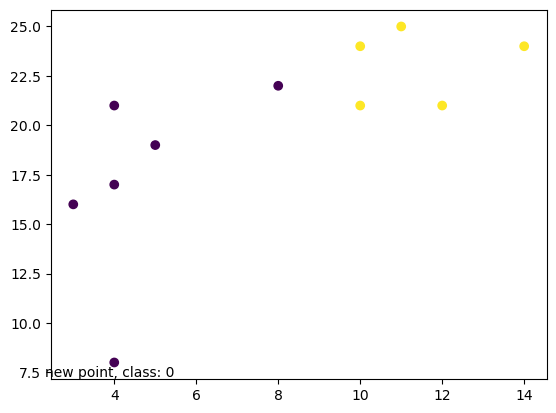

In [43]:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
knn.fit(data, classes)
var1=4
var2=8
new_data=[(var1,var2)]
prediction=knn.predict(new_data)
plt.scatter(x + [var1], y + [var2], c=classes + [prediction[0]])
plt.text(x=var1-1.7, y=var2-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

prediction = knn.predict(new_data)

plt.scatter(x + [var1], y + [var2], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new data, class: {prediction[0]}")
plt.show()

NameError: name 'new_x' is not defined